In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection 
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [129]:
import warnings
warnings.filterwarnings('ignore')

In [106]:
df = fetch_openml('credit-g', as_frame=True)

In [107]:
type(df)

sklearn.utils.Bunch

In [108]:
X = df.data
y = df.target

In [109]:
%matplotlib inline

### Question 1.1 
Determine which features are continuous and which are categorical.

In [110]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
checking_status           1000 non-null category
duration                  1000 non-null float64
credit_history            1000 non-null category
purpose                   1000 non-null category
credit_amount             1000 non-null float64
savings_status            1000 non-null category
employment                1000 non-null category
installment_commitment    1000 non-null float64
personal_status           1000 non-null category
other_parties             1000 non-null category
residence_since           1000 non-null float64
property_magnitude        1000 non-null category
age                       1000 non-null float64
other_payment_plans       1000 non-null category
housing                   1000 non-null category
existing_credits          1000 non-null float64
job                       1000 non-null category
num_dependents            1000 non-null float64
own_telephone      

In [111]:
cols = X.columns
numeric_cols = X._get_numeric_data().columns

In [112]:
# If numeric feature has level less than 4, view it as a categorical features
cont_col = []
cat_col = list(set(cols) - set(num_cols))
for col in numeric_cols:
    if max(list(X[col]))-min(list(X[col]))<4:
        cat_col.append(col)
        X[col] = X[col].astype('category')

    else:
        cont_col.append(col)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [113]:
cont_col

['duration', 'credit_amount', 'age']

In [114]:
cat_col

['other_parties',
 'foreign_worker',
 'savings_status',
 'own_telephone',
 'checking_status',
 'other_payment_plans',
 'property_magnitude',
 'housing',
 'job',
 'employment',
 'personal_status',
 'credit_history',
 'purpose',
 'installment_commitment',
 'residence_since',
 'existing_credits',
 'num_dependents']

### Question 1.2
Visualize the univariate distribution of each continuous feature, and the distribution of the
target.

Text(0.5, 1.0, 'target distribution')

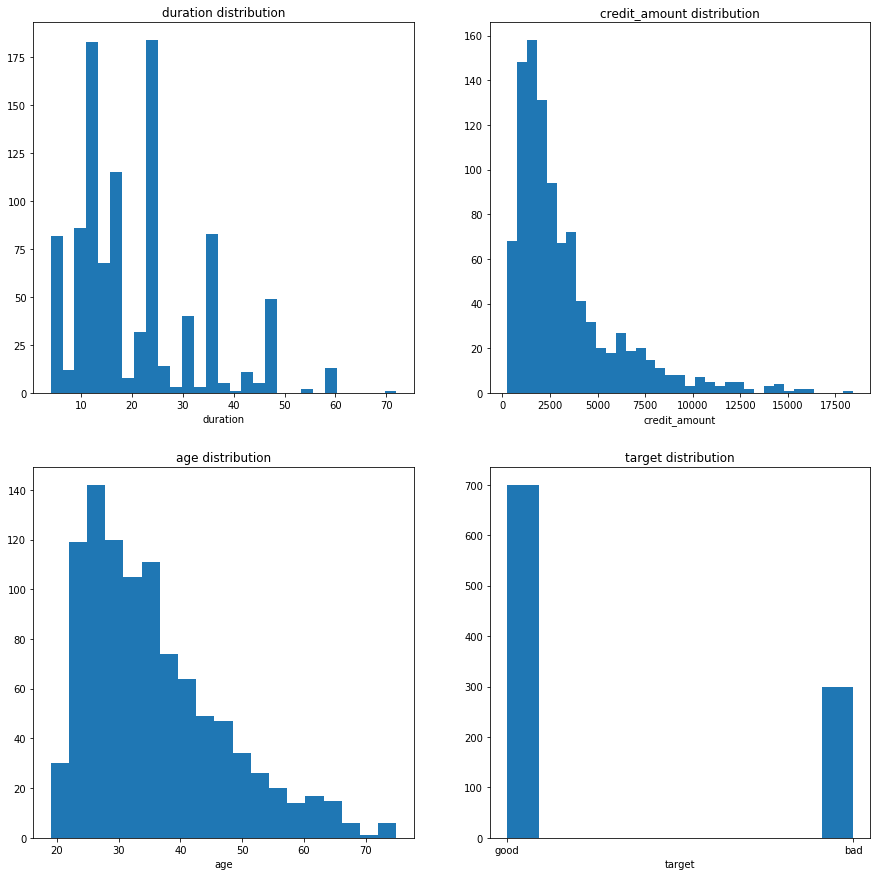

In [115]:
fig,ax = plt.subplots(2,2,figsize = (15,15))

ax[0,0].hist(X['duration'], bins = "auto")
ax[0,0].set_xlabel("duration")
ax[0,0].set_title("duration distribution")

ax[0,1].hist(X["credit_amount"], bins = "auto")
ax[0,1].set_xlabel("credit_amount")
ax[0,1].set_title("credit_amount distribution")

ax[1,0].hist(X["age"],bins = "auto")
ax[1,0].set_xlabel("age")
ax[1,0].set_title("age distribution")

ax[1,1].hist(y,bins = "auto")
ax[1,1].set_xlabel("target")
ax[1,1].set_title("target distribution")


### Question1.3
Split data into training and test set. Do not use the test set until a final evaluation in 1.5.
Preprocess the data (such as treatment of categorical variables) without using a pipeline and
evaluate an initial LogisticRegression model with an training/validation split.

In [118]:
X_dummy = pd.get_dummies(X)

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y)

In [132]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=10)
np.mean(scores), np.std(scores)

(0.748, 0.03499841266241784)